In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 认识K近邻

E:\app\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


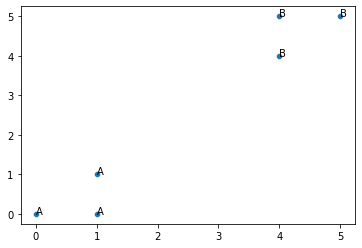

In [191]:
data_x = np.array([
    [0,0],
    [1,1],
    [1,0],
    [4,5],
    [4,4],
    [5,5]
])
data_y=["A","A","A","B","B","B"]
axis = sns.scatterplot(data_x[:,0],data_x[:,1])
for x,y,text in zip(data_x[:,0],data_x[:,1],data_y):
    axis.text(x,y,text)

In [77]:
# n_neighbors即为k近邻中的k点数，默认为5,小于等于样本数
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(data_x,data_y)
knn.predict([[4,3]])

array(['B'], dtype='<U1')

# 实例

In [223]:
data = pd.read_csv("data/datingTextSet.txt",sep="\t",header=None,names=["filghting_Time","IceCreams","game_time","outcome"])
data.head(2)

,filghting_Time,IceCreams,game_time,outcome
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses


In [224]:
data_x = data.drop("outcome",axis=1)
data_y = data["outcome"]
data_x.head(2),len(data_x)

(   filghting_Time  IceCreams  game_time
 0           40920   8.326976   0.953952
 1           14488   7.153469   1.673904,
 1000)

In [225]:
#knn.score是训练评分，第一个参数是训练样本，第二个参数是训练结果的准确值
knn = KNeighborsClassifier(n_neighbors=200)
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(data_x,data_y,train_size=0.50)
knn.fit(x_train,y_train)
knn.score(x_test,y_test),knn.predict([[50000,0.5,0.5]])

(0.788, array(['largeDoses'], dtype=object))

# 标准化

In [218]:
# 标准化
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)
# 训练
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.946